<a href="https://colab.research.google.com/github/swarnavamondal/Autonomous-maze-solving-bot/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Dec 26 18:23:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [6]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [5]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 11, in <module>
    from ultralytics.cfg import TASK2DATA, get_cfg, get_save_dir
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 12, in <module>
    from ultralytics.utils import (
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 512, in <module>
    DEFAULT_CFG_DICT = yaml_load(DEFAULT_CFG_PATH)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 490, in yaml_load
    data = yaml.safe_load(s) or {}  # always return a dict (yaml.safe_load() may return None for empty files)
  File "/usr/local/lib/python3.10/dist-packages/yaml/__init__.py", line 125, in

**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

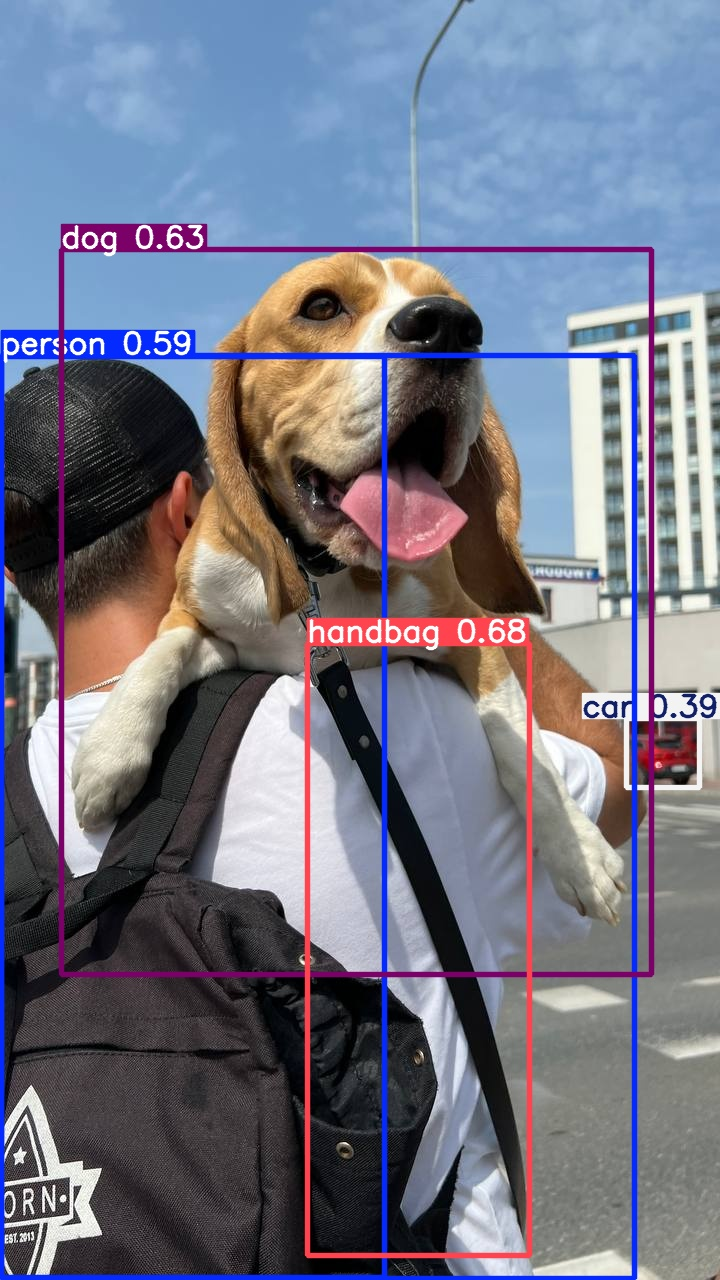

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpeg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 60.1ms
Speed: 3.9ms preprocess, 60.1ms inference, 924.2ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([26., 16.,  0.,  0.,  2.], device='cuda:0')

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

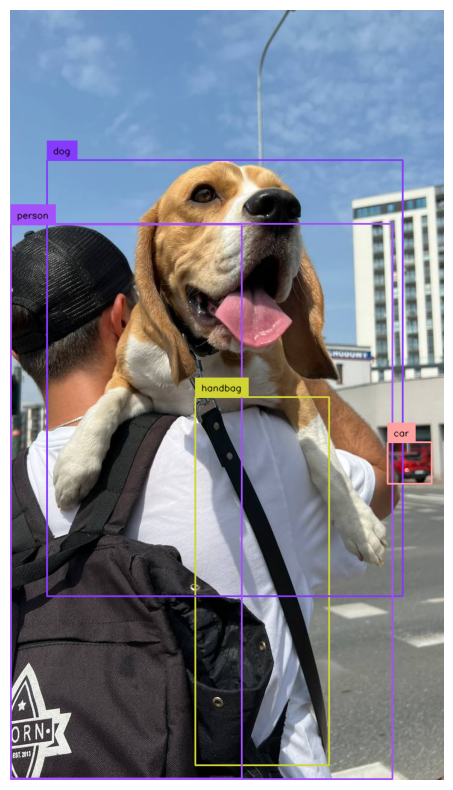

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [78]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("basketball-lce2d").project("basketball-elhar")
version = project.version(7)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [37]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 batch=16 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/basketball-7/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [38]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			    R_curve.png		 val_batch0_pred.jpg
confusion_matrix.png				    results.csv		 val_batch1_labels.jpg
events.out.tfevents.1735238542.8b2fed46f35d.5395.0  results.png		 val_batch1_pred.jpg
F1_curve.png					    roboflow_deploy.zip  val_batch2_labels.jpg
labels_correlogram.jpg				    state_dict.pt	 val_batch2_pred.jpg
labels.jpg					    train_batch0.jpg	 weights
model_artifacts.json				    train_batch1.jpg
P_curve.png					    train_batch2.jpg


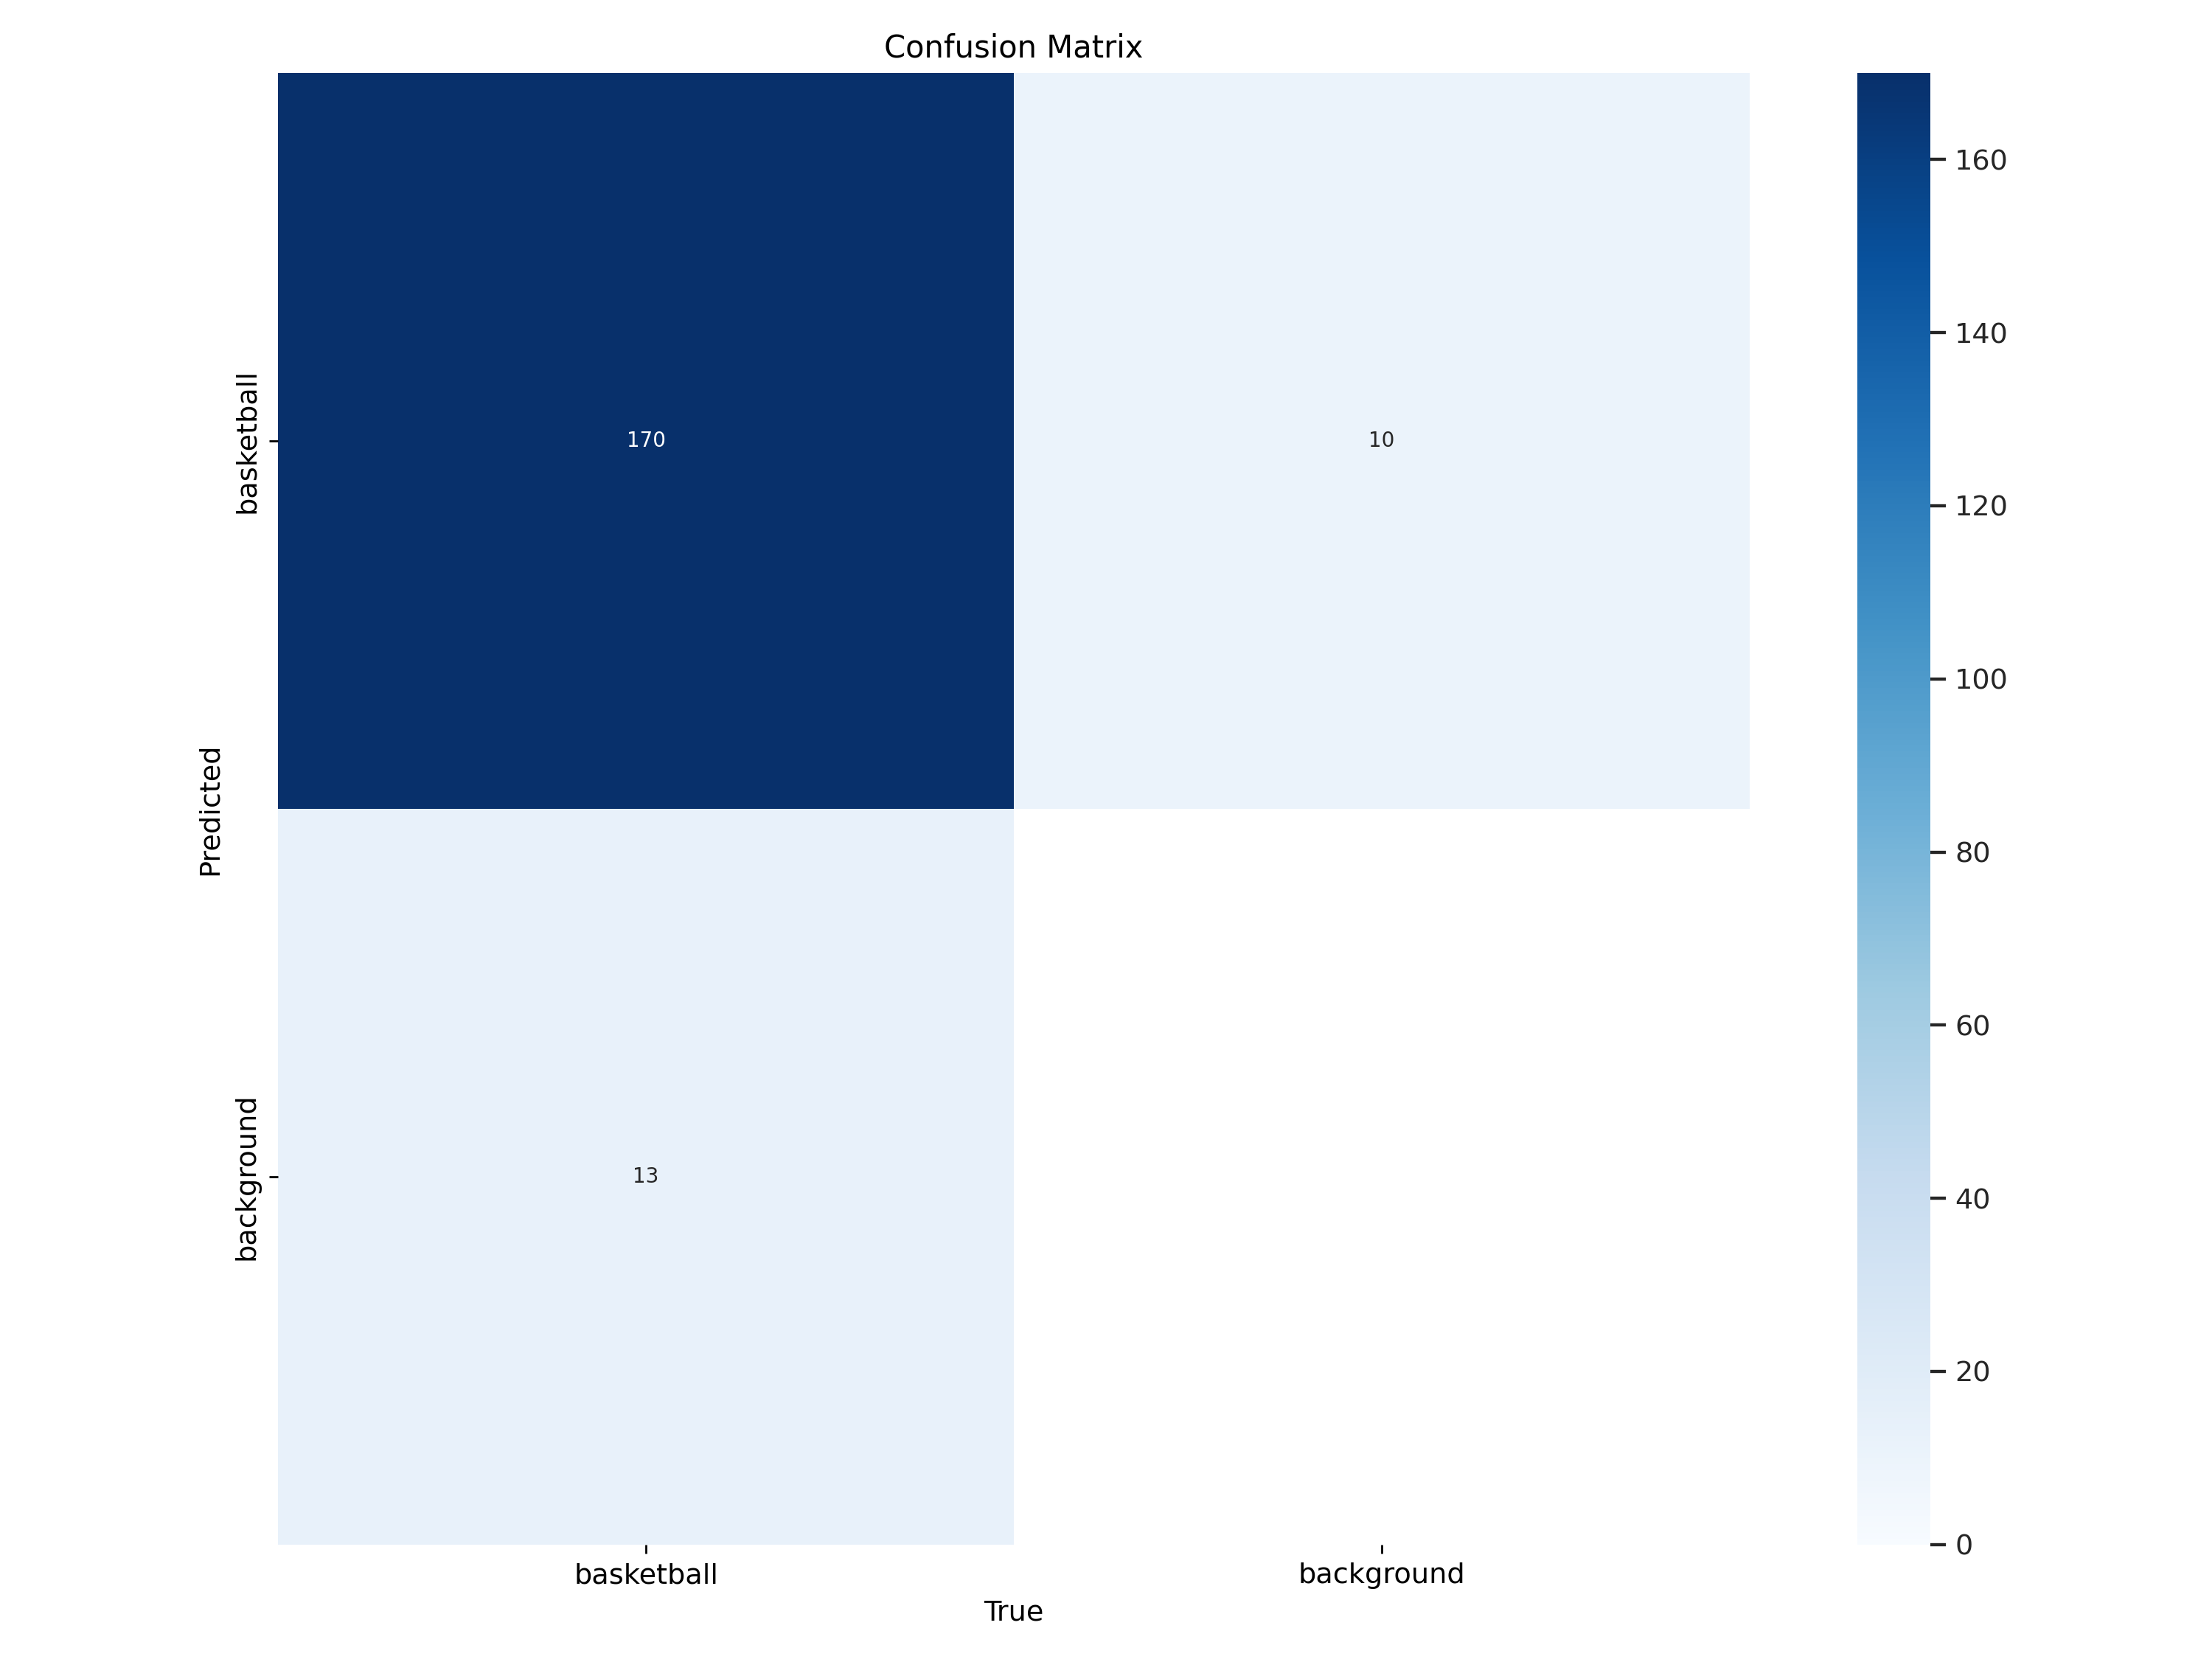

In [39]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

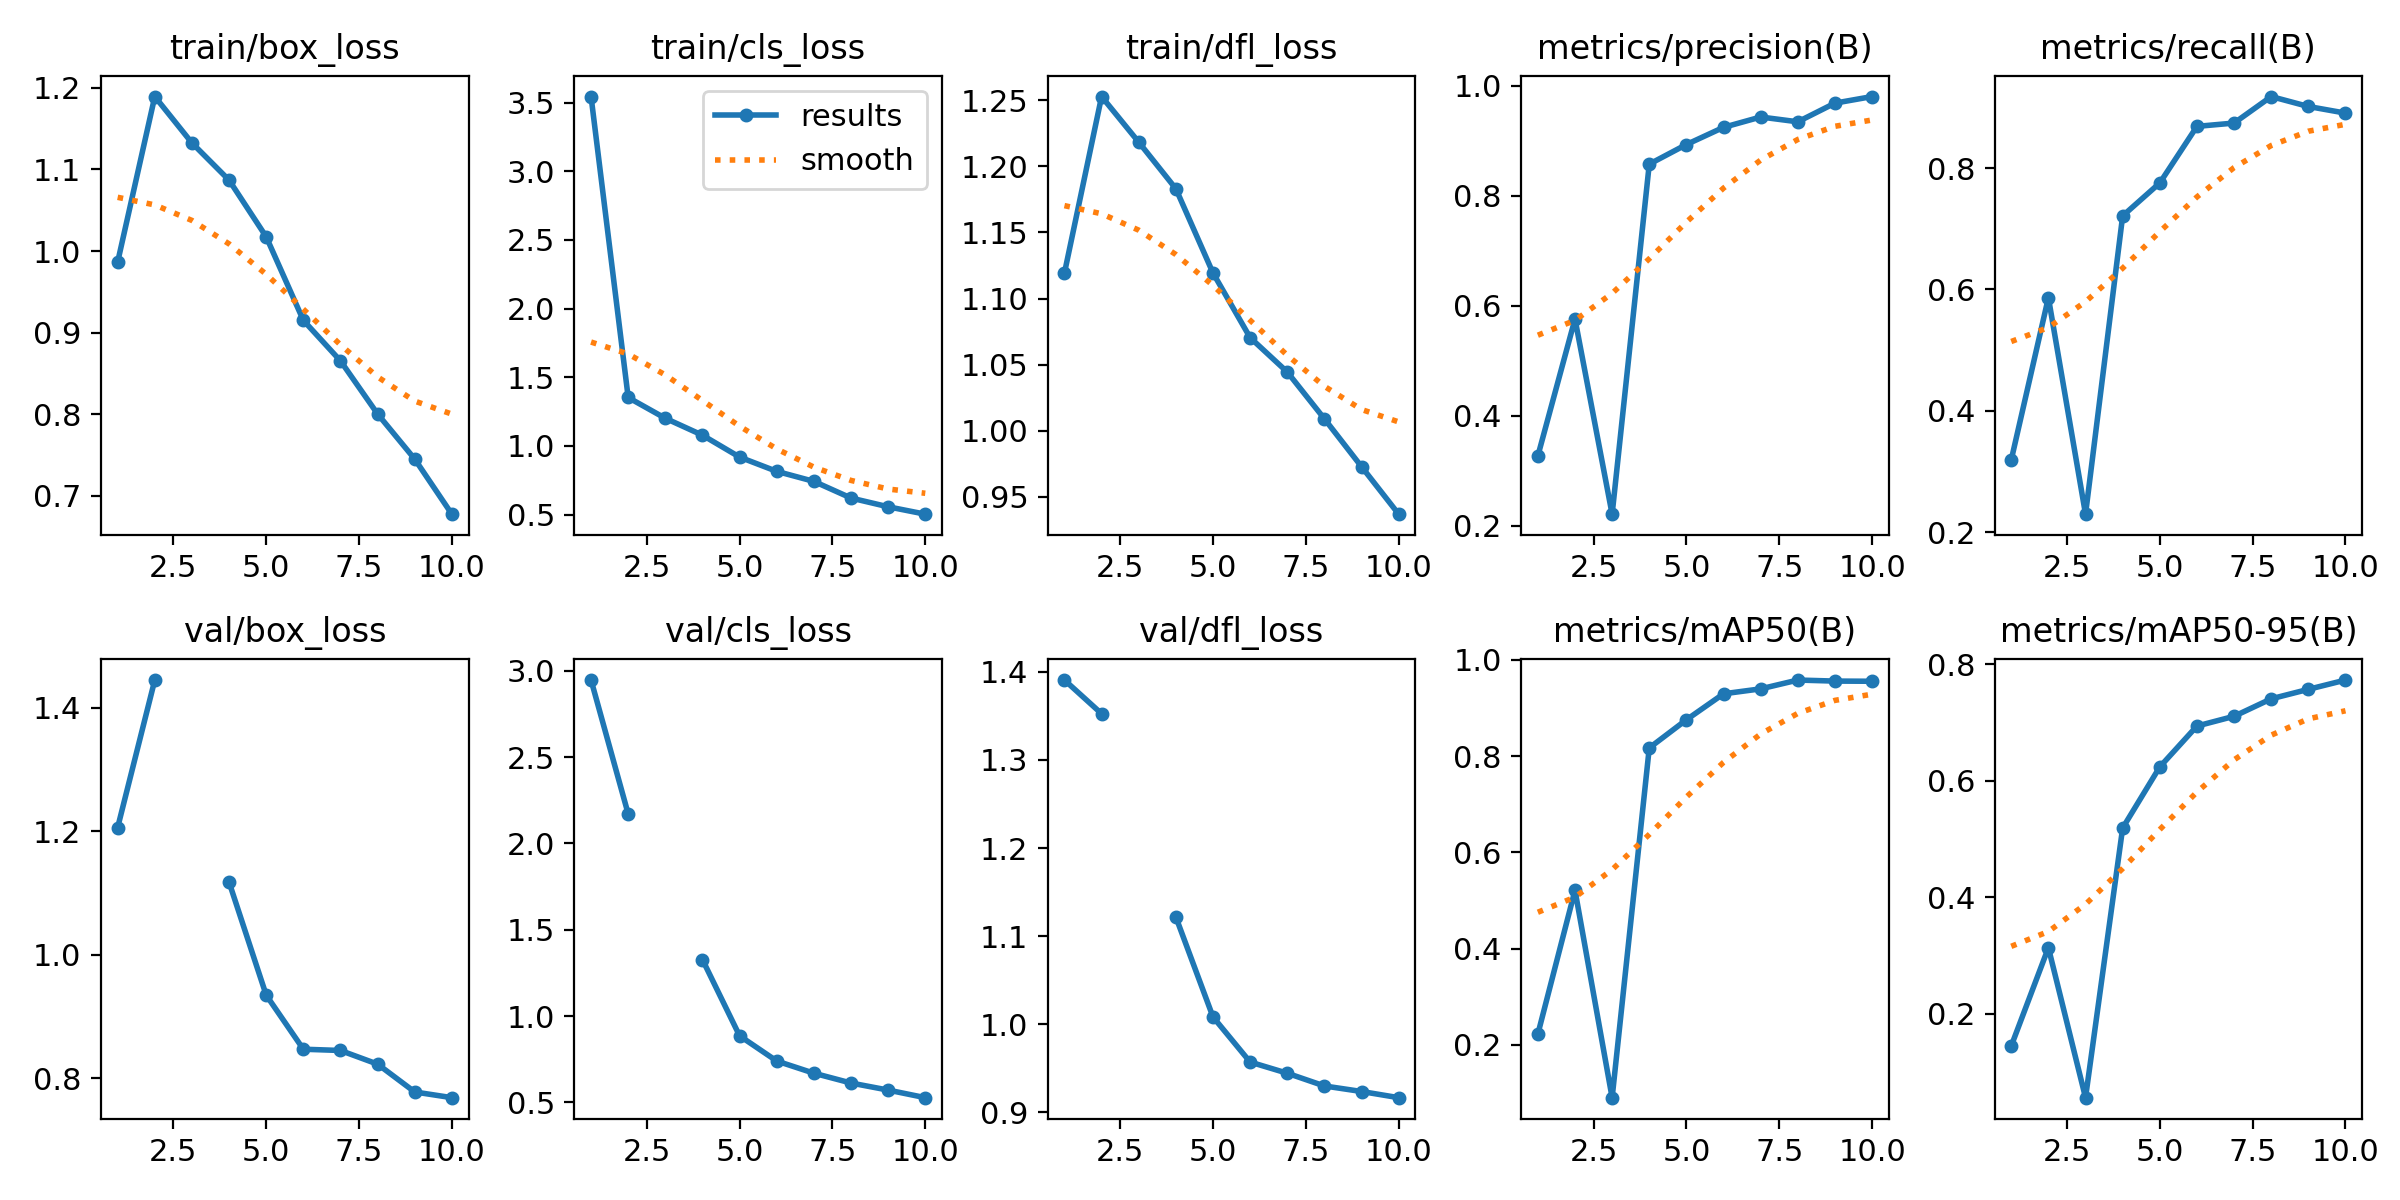

In [40]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

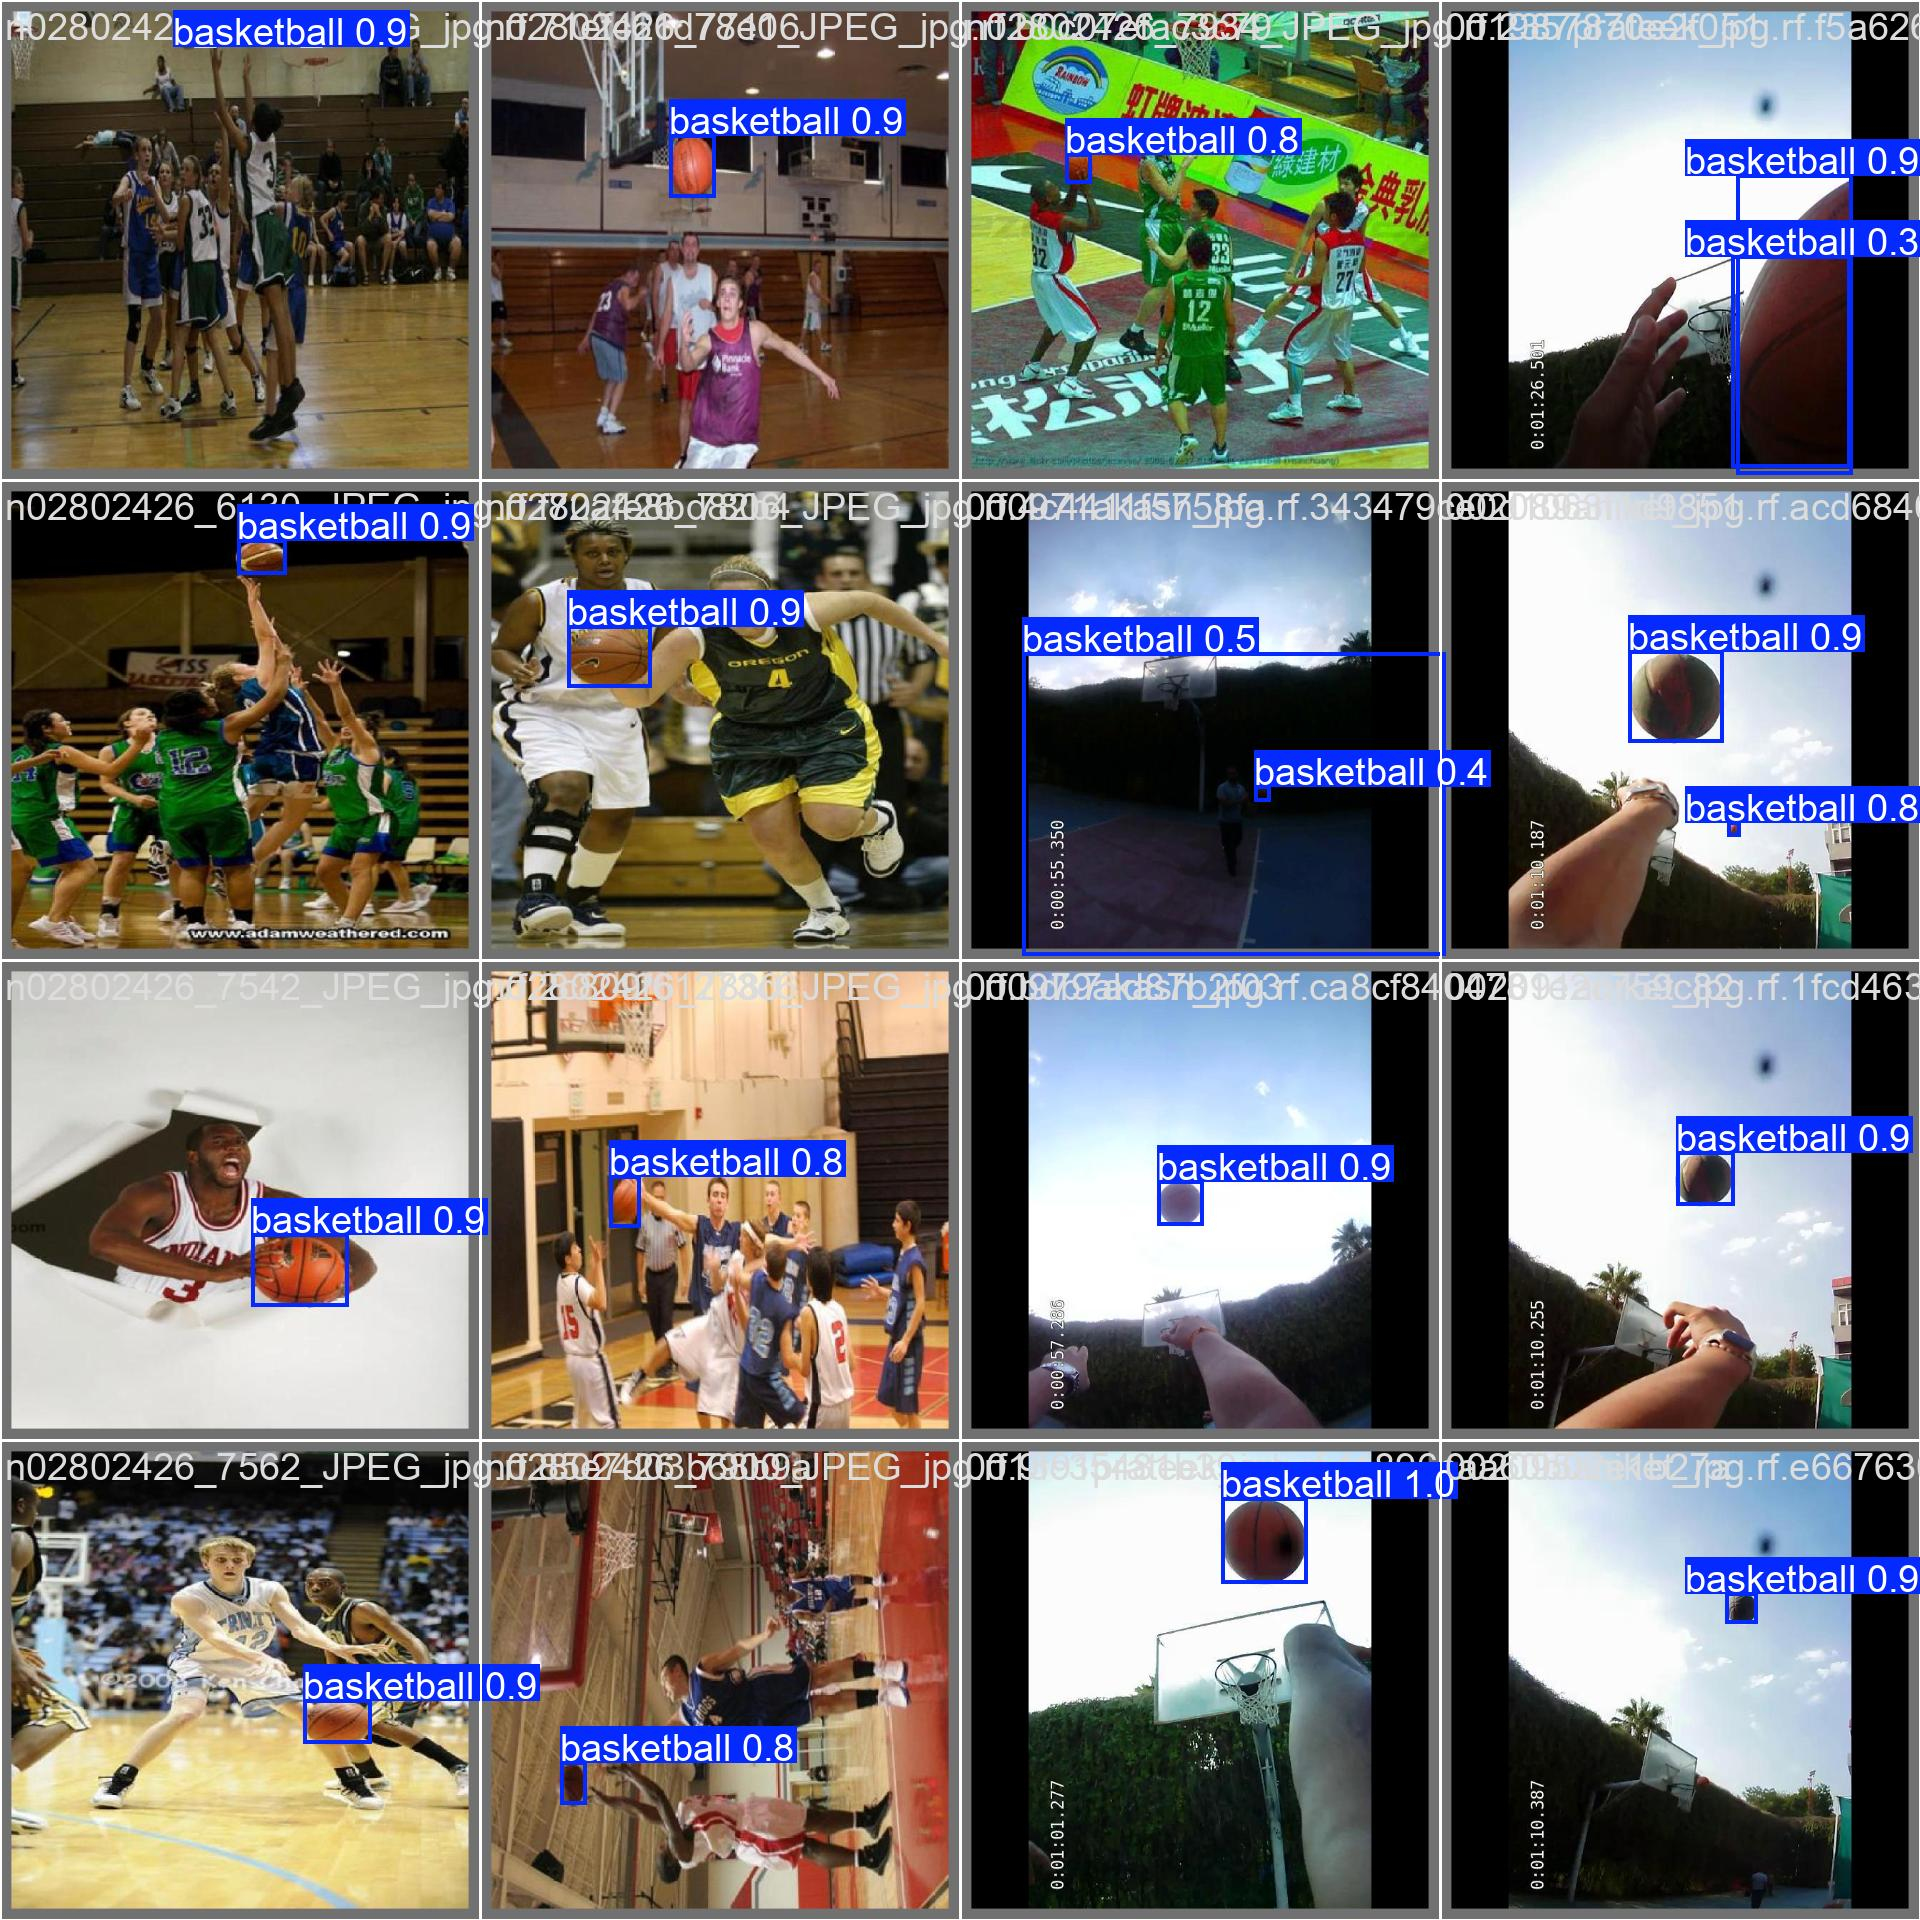

In [41]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [42]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/basketball-7/valid/labels.cache... 165 images, 1 backgrounds, 0 corrupt: 100% 165/165 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  2.94it/s]
                   all        165        183       0.98      0.891      0.955      0.771
Speed: 1.2ms preprocess, 10.7ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [43]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/83 /content/datasets/basketball-7/test/images/001089siva_jpg.rf.85c967c98076808bc389e34f9d9ac50e.jpg: 640x640 1 basketball, 19.3ms
image 2/83 /content/datasets/basketball-7/test/images/001694prateek_jpg.rf.d220a0f8a9f6d926c846e3c21791cdec.jpg: 640x640 1 basketball, 15.6ms
image 3/83 /content/datasets/basketball-7/test/images/001714prateek_jpg.rf.fdbec73dd04980bcef9a6393fd0d6466.jpg: 640x640 1 basketball, 15.5ms
image 4/83 /content/datasets/basketball-7/test/images/001846siva_krishan_jpg.rf.1ac3b60cdb6709f12b547473c2bbe34e.jpg: 640x640 1 basketball, 15.5ms
image 5/83 /content/datasets/basketball-7/test/images/001988prateek_jpg.rf.86b45913f94c39c5b74037f11c1cb5d0.jpg: 640x640 1 basketball, 15.5ms
image 6/83 /content/datasets/basketball-7/test/images/002022krishan_jpg.rf.7e7b264cd8364b1783c61d44c2132a6f.jpg: 640x640 

**NOTE:** Let's take a look at few results.

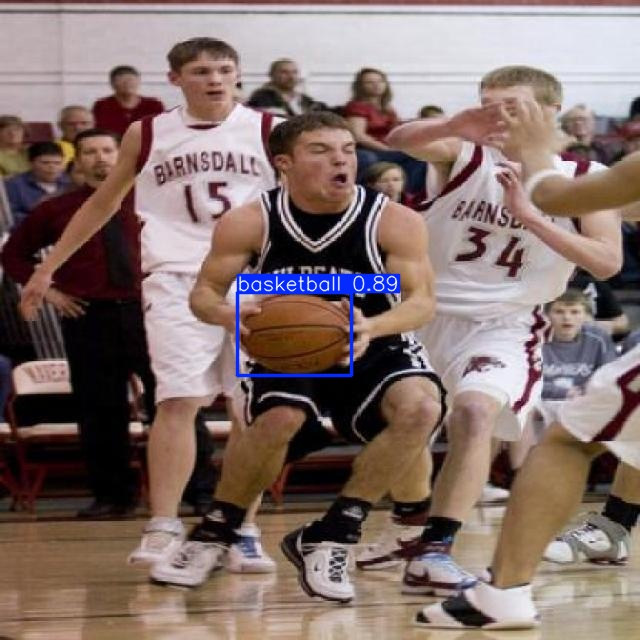

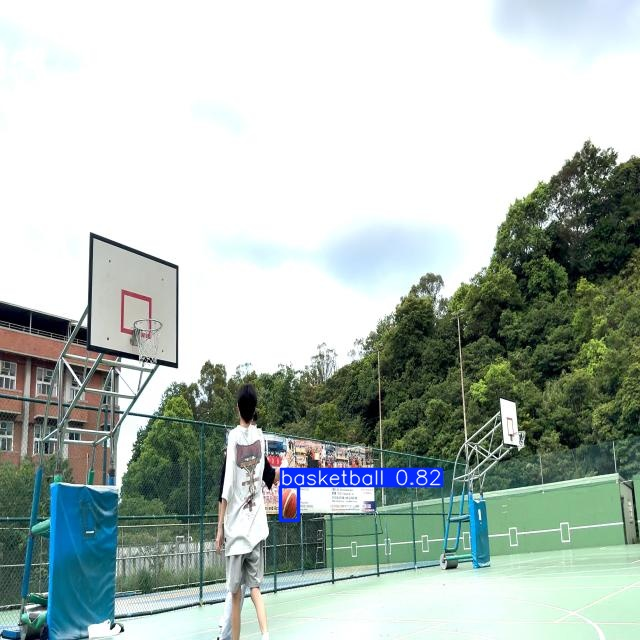

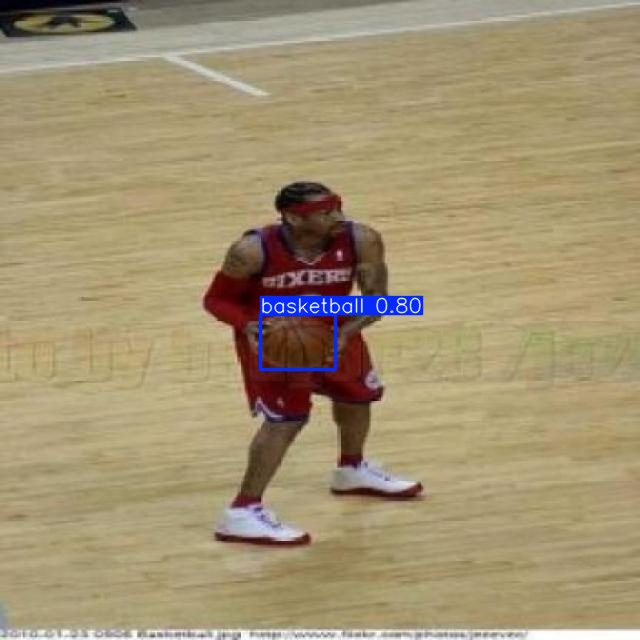

In [77]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [79]:


project = rf.workspace("liangdianzhong").project("basketball-elhar")  # Changed workspace and project IDs
version = project.version(7) # Changed version number if necessary
version.deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")


loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/liangdianzhong/basketball-elhar/7/uploadModel?api_key=i8jfIZqr8I4eGx8D6kES&modelType=yolov11&nocache=true


In [81]:
project.version(dataset.version).deploy(model_type="yolov11",model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/liangdianzhong/basketball-elhar/7/uploadModel?api_key=i8jfIZqr8I4eGx8D6kES&modelType=yolov11&nocache=true


In [80]:
import roboflow
rf = roboflow.Roboflow(api_key="ROBOFLOW_API_KEY")
workspace_info = rf.workspace()  # Make the GET request to '/'
print(workspace_info)

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=undefined&ref=undefined
loading Roboflow workspace...


AttributeError: 'Roboflow' object has no attribute 'current_workspace'

In [75]:
import roboflow
rf = roboflow.Roboflow(api_key="ROBOFLOW_API_KEY")

# Authenticate and get workspace information
workspace_info = rf.workspaces()  # Get a list of workspaces

# Select the desired workspace (replace with the actual workspace name)
workspace_name = "liangdianzhong"
workspace = rf.workspace(workspace_name)

# Now you can access projects and versions within the workspace
print(workspace)  # Prints details of the selected workspace

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=undefined&ref=undefined


AttributeError: 'Roboflow' object has no attribute 'workspaces'

In [54]:
print("Project ID:", project.id)
print("Version ID:", version.id)

Project ID: liangdianzhong/basketball-elhar
Version ID: liangdianzhong/basketball-elhar/7


In [82]:
# prompt: upload the model to roboflow

import os
from roboflow import Roboflow
from google.colab import userdata

# Assuming you've already trained your model and the weights are in the specified path
model_path = f"{HOME}/runs/detect/train/"

# Replace with your actual workspace and project IDs from Roboflow
workspace_id = "liangdianzhong"
project_id = "basketball-elhar"
version_number = 7

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

try:
    project = rf.workspace(workspace_id).project(project_id)
    version = project.version(version_number)
    version.deploy(model_type="yolov11", model_path=model_path)

    print("Project ID:", project.id)
    print("Version ID:", version.id)
    print("Model successfully deployed to Roboflow!")

except Exception as e:
    print(f"An error occurred during deployment: {e}")

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/liangdianzhong/basketball-elhar/7/uploadModel?api_key=i8jfIZqr8I4eGx8D6kES&modelType=yolov11&nocache=true
Project ID: liangdianzhong/basketball-elhar
Version ID: liangdianzhong/basketball-elhar/7
Model successfully deployed to Roboflow!


In [ ]:
!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.